In [1]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

In [2]:
from collections import Counter

In [3]:
import pandas as pd
import numpy as np
import itertools as it

import pickle as pcl

from scipy.spatial.distance import cdist

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.cm as cm

from itertools import compress

import brewer2mpl

# Get "Set2" colors from ColorBrewer (all colorbrewer scales: http://bl.ocks.org/mbostock/5577023)
set2 = brewer2mpl.get_map('Set2', 'qualitative', 8).mpl_colors

from mpl_toolkits.mplot3d import Axes3D

from sklearn.cluster import MeanShift

In [4]:
import hightolowz

In [5]:
#%run load_wmap1.py

gals = pd.read_csv('data/planck1/henriques2015a_z3p95_mstar.csv', 
                   skiprows=101, skipfooter=1, engine='python')

Load the 'protocluster catalog'

In [31]:
protoclusters_20, pc_members_20 = pcl.load(open('data/wmap1/protoclusters_r20.p','rb'))
protoclusters_15, pc_members_15 = pcl.load(open('data/wmap1/protoclusters_r15.p','rb'))
protoclusters_10, pc_members_10 = pcl.load(open('data/wmap1/protoclusters_r10.p','rb'))

In [32]:
print len(protoclusters_10)
print len(protoclusters_15)
print len(protoclusters_20)

8187
2798
1270


In [33]:
print sum(z6_galaxies_mstar.ix[protoclusters_10]['ngal_10'] < 4)
print sum(z6_galaxies_mstar.ix[protoclusters_15]['ngal_15'] < 4)
print sum(z6_galaxies_mstar.ix[protoclusters_20]['ngal_20'] < 4)

402
0
0


Filter protocluster candidates by those with $\delta_{gal} > \delta_{lim}$

In [34]:
delta_lim = 0.

overdense_10 = z6_galaxies_mstar.ix[protoclusters_10]['delta_gal_10'] > delta_lim
overdense_15 = z6_galaxies_mstar.ix[protoclusters_15]['delta_gal_15'] > delta_lim
overdense_20 = z6_galaxies_mstar.ix[protoclusters_20]['delta_gal_20'] > delta_lim

In [35]:
pc_members_10 = list(compress(pc_members_10, overdense_10))
pc_members_15 = list(compress(pc_members_15, overdense_15))
pc_members_20 = list(compress(pc_members_20, overdense_20))

In [36]:
protoclusters_10 = list(compress(protoclusters_10, overdense_10))
protoclusters_15 = list(compress(protoclusters_15, overdense_15))
protoclusters_20 = list(compress(protoclusters_20, overdense_20))

How many $z=0$ halos do the identified protoclusters evolve in to? What's the ratio of the most common halo descendant with the total number of halo descendants?

In [37]:
z0_halos_20, halo_ratio_20 = hightolowz.z0_halo_properties(protoclusters_20, pc_members_20, z6_galaxies_mstar)
z0_halos_15, halo_ratio_15 = hightolowz.z0_halo_properties(protoclusters_15, pc_members_15, z6_galaxies_mstar)
z0_halos_10, halo_ratio_10 = hightolowz.z0_halo_properties(protoclusters_10, pc_members_10, z6_galaxies_mstar)

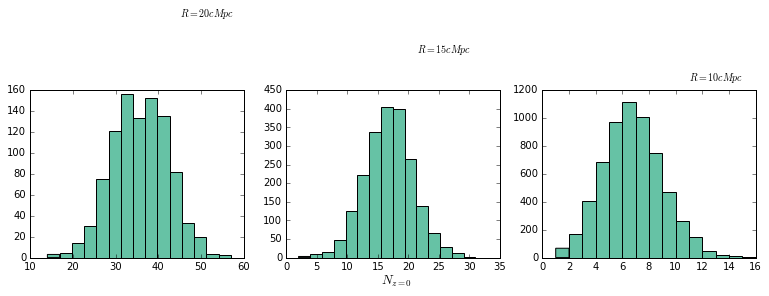

In [38]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(13,3))

ax1.hist([len(x) for x in z0_halos_20], 15, color=set2[0])
ax2.hist([len(x) for x in z0_halos_15], 15, color=set2[0])
ax3.hist([len(x) for x in z0_halos_10], 15, color=set2[0])

ax1.text(45, 230, '$R = 20 cMpc$')
ax2.text(21.5, 550, '$R = 15 cMpc$')
ax3.text(11, 1270, '$R = 10 cMpc$')

fig.text(0.5,0,'$N_{z=0}$', size=13)

#plt.savefig('../papers/hightolowz/images/galaxy_overdensity_z0halo_count.png', bbox_inches='tight', dpi=300)

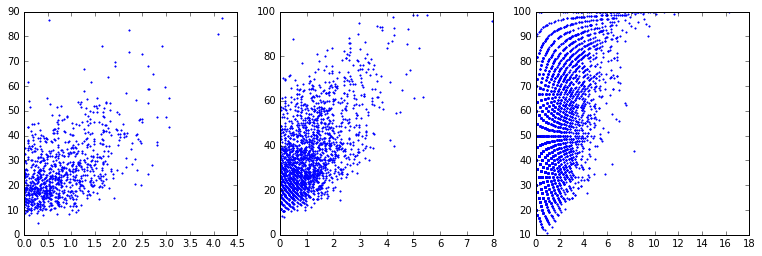

In [39]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(13,4))

ax1.plot(z6_galaxies_mstar.ix[protoclusters_20]['delta_gal_20'], halo_ratio_20, '.', markersize=3)
ax2.plot(z6_galaxies_mstar.ix[protoclusters_15]['delta_gal_15'], halo_ratio_15, '.', markersize=3)
ax3.plot(z6_galaxies_mstar.ix[protoclusters_10]['delta_gal_10'], halo_ratio_10, '.', markersize=3)

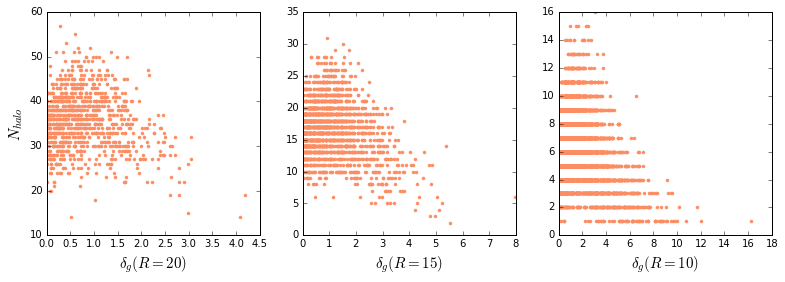

In [40]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(13,4))

ax1.plot(z6_galaxies_mstar.ix[protoclusters_20]['delta_gal_20'], [len(x) for x in z0_halos_20], '.', alpha=1, c=set2[1])
ax2.plot(z6_galaxies_mstar.ix[protoclusters_15]['delta_gal_15'], [len(x) for x in z0_halos_15], '.', alpha=1, c=set2[1])
ax3.plot(z6_galaxies_mstar.ix[protoclusters_10]['delta_gal_10'], [len(x) for x in z0_halos_10], '.', alpha=1, c=set2[1])

ax1.set_xlabel('$\delta_{g}(R=20)$', size=15)
ax2.set_xlabel('$\delta_{g}(R=15)$', size=15)
ax3.set_xlabel('$\delta_{g}(R=10)$', size=15)

ax1.set_ylabel('$N_{halo}$', size=15)

#plt.savefig('../papers/hightolowz/images/halo_count_overdensity.png', bbox_inches='tight', dpi=300)

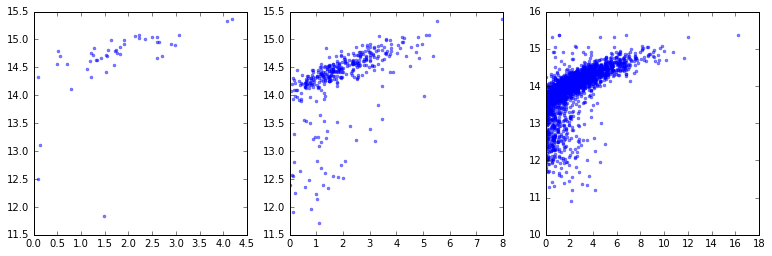

In [41]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(13,4))

ax1.plot(z6_galaxies_mstar.ix[protoclusters_20][[x > 50 for x in halo_ratio_20]]['delta_gal_20'],
         np.log10(z6_galaxies_mstar.ix[protoclusters_20][[x > 50 for x in halo_ratio_20]]['z0_centralMvir']*1e10),
         '.', alpha=0.5)

ax2.plot(z6_galaxies_mstar.ix[protoclusters_15][[x > 50 for x in halo_ratio_15]]['delta_gal_15'],
         np.log10(z6_galaxies_mstar.ix[protoclusters_15][[x > 50 for x in halo_ratio_15]]['z0_centralMvir']*1e10),
         '.', alpha=0.5)

ax3.plot(z6_galaxies_mstar.ix[protoclusters_10][[x > 50 for x in halo_ratio_10]]['delta_gal_10'],
         np.log10(z6_galaxies_mstar.ix[protoclusters_10][[x > 50 for x in halo_ratio_10]]['z0_centralMvir']*1e10),
         '.', alpha=0.5)

## Regression

### Single feature

In [10]:
gals['']

KeyError: ''

In [15]:
selection='mstar9'
redshift='3p95'
dgal_random_r20 = pd.read_csv('data/planck1/dgal_%s_%s_r20_random.csv' % (selection, redshift))
dgal_random_r15 = pd.read_csv('data/planck1/dgal_%s_%s_r15_random.csv' % (selection, redshift))
dgal_random_r10 = pd.read_csv('data/planck1/dgal_%s_%s_r10_random.csv' % (selection, redshift))
dgal_random_r5 = pd.read_csv('data/planck1/dgal_%s_%s_r5_random.csv' % (selection, redshift))

In [28]:
dgal_random_r20.loc[:,'cluster'] = False
dgal_random_r20.loc[(dgal_random_r20['max_fraction_20'] > 0.5) & (dgal_random_r20['max_fraction_mass_20'] > 1e4), 'cluster'] = True

In [85]:
regr = LinearRegression()

#features = z6_galaxies_mstar.ix[protoclusters_15][[x > 50 for x in halo_ratio_15]][['delta_gal_15']]
#predictors = np.log10(z6_galaxies_mstar.ix[protoclusters_15][[x > 50 for x in halo_ratio_15]]['z0_centralMvir']*1e10)

features = z6_galaxies_mstar.ix[protoclusters_20][['delta_gal_20']]
predictors = np.log10(z6_galaxies_mstar.ix[protoclusters_20]['z0_centralMvir']*1e10)

regr.fit(features, predictors)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [86]:
print regr.coef_
print regr.intercept_

[ 0.50557655]
13.0847140161


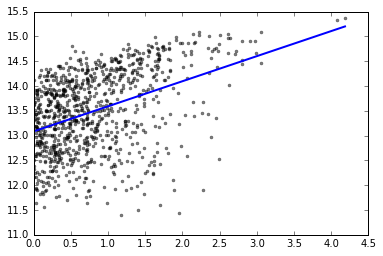

In [87]:
plt.plot(features, predictors, '.', c='black', alpha=0.5)
plt.plot(features, regr.predict(features), c='blue', linewidth=2)

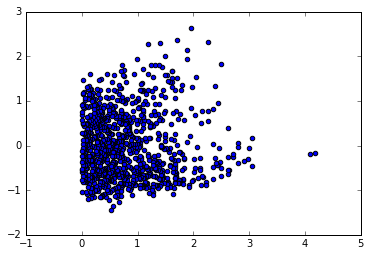

In [88]:
plt.scatter(features, regr.predict(features) - predictors)

### Single Polynomial Feature

In [89]:
model = Pipeline([('poly', PolynomialFeatures(degree=2)),
                   ('linear', LinearRegression(fit_intercept=False))])

features = z6_galaxies_mstar.ix[protoclusters_20][['delta_gal_20']]
predictors = np.log10(z6_galaxies_mstar.ix[protoclusters_20]['z0_centralMvir']*1e10)

model.fit(features, predictors)

Pipeline(steps=[('poly', PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)), ('linear', LinearRegression(copy_X=True, fit_intercept=False, n_jobs=1, normalize=False))])

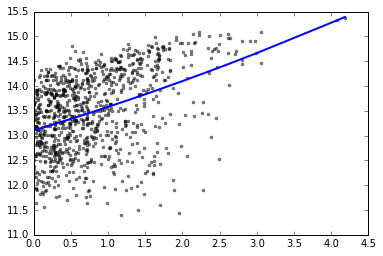

In [90]:
plt.plot(features, predictors, '.', c='black', alpha=0.5)
plt.plot(features, model.predict(features), c='blue', linewidth=2)

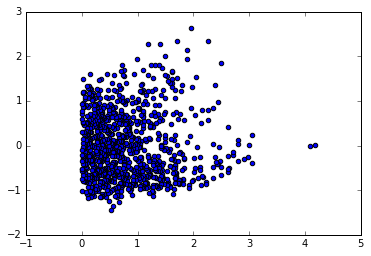

In [91]:
plt.scatter(features, model.predict(features) - predictors)

### Multiple features

In [92]:
regr = LinearRegression()

#features = z6_galaxies_mstar.ix[protoclusters_15][[x > 50 for x in halo_ratio_15]][['delta_gal_15', 'delta_gal_10', 'delta_gal_20']]
#predictors = np.log10(z6_galaxies_mstar.ix[protoclusters_15][[x > 50 for x in halo_ratio_15]]['z0_centralMvir'] * 1e10)

features = z6_galaxies_mstar.ix[protoclusters_20][['delta_gal_15', 'delta_gal_10', 'delta_gal_20']]
predictors = np.log10(z6_galaxies_mstar.ix[protoclusters_20]['z0_centralMvir'] * 1e10)

regr.fit(features, predictors)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [97]:
regr.intercept_

12.979879799362063

In [98]:
regr.coef_

array([-0.08654692,  0.36955382,  0.07237367])

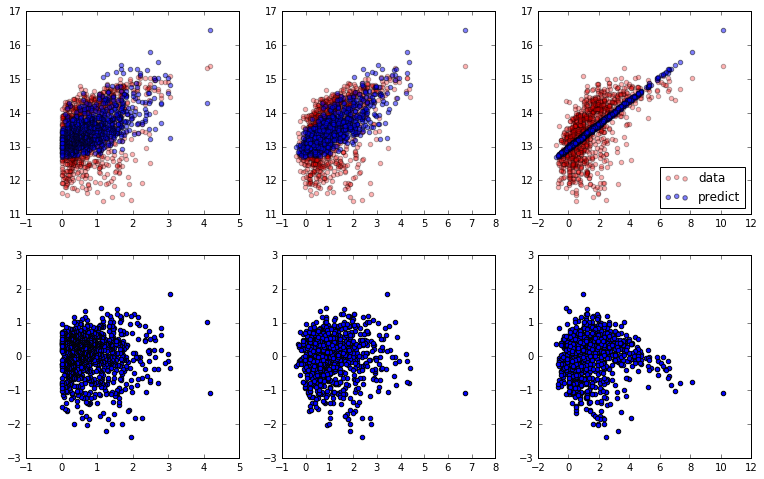

In [94]:
fig, ax = plt.subplots(2,3, figsize=(13,8))

ax = ax.flatten()

ax[0].scatter(features['delta_gal_20'], predictors, c='red', alpha = 0.3)
ax[0].scatter(features['delta_gal_20'], regr.predict(features), c='blue', alpha=0.5)

ax[1].scatter(features['delta_gal_15'], predictors, c='red', alpha = 0.3)
ax[1].scatter(features['delta_gal_15'], regr.predict(features), c='blue', alpha=0.5)

ax[2].scatter(features['delta_gal_10'], predictors, c='red', alpha = 0.3, label='data')
ax[2].scatter(features['delta_gal_10'], regr.predict(features), c='blue', alpha=0.5, label='predict')

ax[3].scatter(features['delta_gal_20'], predictors - regr.predict(features))
ax[4].scatter(features['delta_gal_15'], predictors - regr.predict(features))
ax[5].scatter(features['delta_gal_10'], predictors - regr.predict(features))

ax[2].legend(loc=4)

### Polynomial features

In [95]:
#features = z6_galaxies_mstar.ix[protoclusters_15][[x > 50 for x in halo_ratio_15]][['delta_gal_15', 'delta_gal_10', 'delta_gal_20']]
#predictors = np.log10(z6_galaxies_mstar.ix[protoclusters_15][[x > 50 for x in halo_ratio_15]]['z0_centralMvir'] * 1e10)

features = z6_galaxies_mstar.ix[protoclusters_20][['delta_gal_15', 'delta_gal_10', 'delta_gal_20']]
predictors = np.log10(z6_galaxies_mstar.ix[protoclusters_20]['z0_centralMvir'] * 1e10)


model = Pipeline([('poly', PolynomialFeatures(degree=2)),
                   ('linear', LinearRegression(fit_intercept=False))])

model.fit(features, predictors)

Pipeline(steps=[('poly', PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)), ('linear', LinearRegression(copy_X=True, fit_intercept=False, n_jobs=1, normalize=False))])

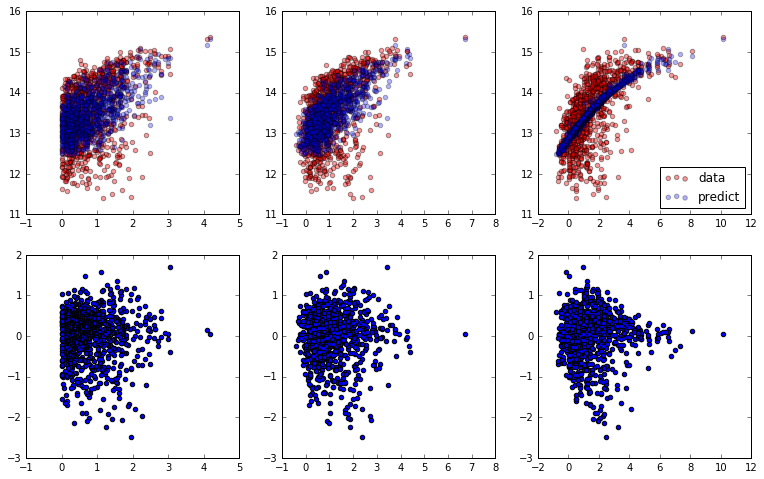

In [96]:
fig, ax = plt.subplots(2,3, figsize=(13,8))

ax = ax.flatten()

ax[0].scatter(features['delta_gal_20'], predictors, c='red', alpha=0.4)
ax[0].scatter(features['delta_gal_20'], model.predict(features), c='blue', alpha = 0.3)

ax[1].scatter(features['delta_gal_15'], predictors, c='red', alpha=0.4)
ax[1].scatter(features['delta_gal_15'], model.predict(features), c='blue', alpha = 0.3)

ax[2].scatter(features['delta_gal_10'], predictors, c='red', label='data', alpha=0.4)
ax[2].scatter(features['delta_gal_10'], model.predict(features), c='blue', label='predict', alpha = 0.3)

ax[3].scatter(features['delta_gal_20'], predictors - model.predict(features))
ax[4].scatter(features['delta_gal_15'], predictors - model.predict(features))
ax[5].scatter(features['delta_gal_10'], predictors - model.predict(features))

ax[2].legend(loc=4)